# RISNet Exploration Notebook
Aaron Gabrielle Dichoso

In [1]:
import numpy as np
import pandas as pd
import cv2
import os
import PIL.Image as Image

## 1. Evaluation of Pre-Trained RISNet

In [2]:
img_root = "Datasets/ACOD-12K/Test/Imgs/"
imgs = [img_root + f for f in os.listdir(img_root) if f.endswith('.tif') or f.endswith('.png')]
print(imgs)

['Datasets/ACOD-12K/Test/Imgs/bean_left_00045.png', 'Datasets/ACOD-12K/Test/Imgs/bean_left_00047.png', 'Datasets/ACOD-12K/Test/Imgs/bean_left_00048.png', 'Datasets/ACOD-12K/Test/Imgs/bean_left_00049.png', 'Datasets/ACOD-12K/Test/Imgs/bean_left_00050.png', 'Datasets/ACOD-12K/Test/Imgs/bean_left_00051.png', 'Datasets/ACOD-12K/Test/Imgs/bean_left_00052.png', 'Datasets/ACOD-12K/Test/Imgs/bean_left_00053.png', 'Datasets/ACOD-12K/Test/Imgs/bean_left_00054.png', 'Datasets/ACOD-12K/Test/Imgs/bean_left_00055.png', 'Datasets/ACOD-12K/Test/Imgs/cucumber_left_00401.png', 'Datasets/ACOD-12K/Test/Imgs/cucumber_left_00402.png', 'Datasets/ACOD-12K/Test/Imgs/cucumber_left_00403.png', 'Datasets/ACOD-12K/Test/Imgs/cucumber_left_00404.png', 'Datasets/ACOD-12K/Test/Imgs/cucumber_left_00405.png', 'Datasets/ACOD-12K/Test/Imgs/cucumber_left_00406.png', 'Datasets/ACOD-12K/Test/Imgs/cucumber_left_00407.png', 'Datasets/ACOD-12K/Test/Imgs/cucumber_left_00408.png', 'Datasets/ACOD-12K/Test/Imgs/cucumber_left_00409.

In [3]:
gt_root = "Datasets/ACOD-12K/Test/GT/"
gts = [gt_root + f for f in os.listdir(gt_root) if f.endswith('.tif') or f.endswith('.png')]
print(gts)

['Datasets/ACOD-12K/Test/GT/bean_left_00045.png', 'Datasets/ACOD-12K/Test/GT/bean_left_00047.png', 'Datasets/ACOD-12K/Test/GT/bean_left_00048.png', 'Datasets/ACOD-12K/Test/GT/bean_left_00049.png', 'Datasets/ACOD-12K/Test/GT/bean_left_00050.png', 'Datasets/ACOD-12K/Test/GT/bean_left_00051.png', 'Datasets/ACOD-12K/Test/GT/bean_left_00052.png', 'Datasets/ACOD-12K/Test/GT/bean_left_00053.png', 'Datasets/ACOD-12K/Test/GT/bean_left_00054.png', 'Datasets/ACOD-12K/Test/GT/bean_left_00055.png', 'Datasets/ACOD-12K/Test/GT/cucumber_left_00401.png', 'Datasets/ACOD-12K/Test/GT/cucumber_left_00402.png', 'Datasets/ACOD-12K/Test/GT/cucumber_left_00403.png', 'Datasets/ACOD-12K/Test/GT/cucumber_left_00404.png', 'Datasets/ACOD-12K/Test/GT/cucumber_left_00405.png', 'Datasets/ACOD-12K/Test/GT/cucumber_left_00406.png', 'Datasets/ACOD-12K/Test/GT/cucumber_left_00407.png', 'Datasets/ACOD-12K/Test/GT/cucumber_left_00408.png', 'Datasets/ACOD-12K/Test/GT/cucumber_left_00409.png', 'Datasets/ACOD-12K/Test/GT/cucum

In [4]:
networks = ['RISNet', 'DaCOD', 'PFNet', 'FSPNet', 'ZoomNet', 'HitNet', 'C2FNet', "SINet_V2", "PreyNet"]
pred_roots = ["Results/" + network + "/ACOD-12K/" for network in networks]
preds_networks = [[pred_root + f for f in os.listdir(pred_root) if f.endswith('.tif') or f.endswith('.png')] for pred_root in pred_roots]
preds_networks

[['Results/RISNet/ACOD-12K/bean_left_00045.png',
  'Results/RISNet/ACOD-12K/bean_left_00047.png',
  'Results/RISNet/ACOD-12K/bean_left_00048.png',
  'Results/RISNet/ACOD-12K/bean_left_00049.png',
  'Results/RISNet/ACOD-12K/bean_left_00050.png',
  'Results/RISNet/ACOD-12K/bean_left_00051.png',
  'Results/RISNet/ACOD-12K/bean_left_00052.png',
  'Results/RISNet/ACOD-12K/bean_left_00053.png',
  'Results/RISNet/ACOD-12K/bean_left_00054.png',
  'Results/RISNet/ACOD-12K/bean_left_00055.png',
  'Results/RISNet/ACOD-12K/cucumber_left_00401.png',
  'Results/RISNet/ACOD-12K/cucumber_left_00402.png',
  'Results/RISNet/ACOD-12K/cucumber_left_00403.png',
  'Results/RISNet/ACOD-12K/cucumber_left_00404.png',
  'Results/RISNet/ACOD-12K/cucumber_left_00405.png',
  'Results/RISNet/ACOD-12K/cucumber_left_00406.png',
  'Results/RISNet/ACOD-12K/cucumber_left_00407.png',
  'Results/RISNet/ACOD-12K/cucumber_left_00408.png',
  'Results/RISNet/ACOD-12K/cucumber_left_00409.png',
  'Results/RISNet/ACOD-12K/cucumb

In [ ]:
import matplotlib.pyplot as plt
import random
from PIL import Image

def display_images(images=3):
    global imgs, gts, preds_networks, networks

    # Get N random images
    random_imgs = random.sample(list(enumerate(imgs)), images)

    # Create subplot
    fig, ax = plt.subplots(images, 2 + len(networks), figsize=(20, 50), constrained_layout=True)
    plt.tight_layout(pad=0.005, h_pad=0.002, w_pad=0.002)

    # Handle case where images=1
    if images == 1:
        ax = [ax]

    # Set titles
    ax[0][0].set_title("Image")
    ax[0][1].set_title("Ground Truth")
    for j, network in enumerate(networks):
        ax[0][j + 2].set_title(network)

    for i in range(images):
        img_idx, img_path = random_imgs[i]
        img = Image.open(img_path)
        gt = Image.open(gts[img_idx])
        preds = [Image.open(preds_network[img_idx]) for preds_network in preds_networks]

        ax[i][0].imshow(img)
        ax[i][0].axis("off")

        ax[i][1].imshow(gt)
        ax[i][1].axis("off")

        for j, pred in enumerate(preds):
            ax[i][j + 2].imshow(pred)
            ax[i][j + 2].axis("off")

    # Reduce whitespace
    plt


C:\Users\Aaron\AppData\Local\Temp\ipykernel_18916\4288141921.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=0.1, h_pad=0.2, w_pad=0.2)


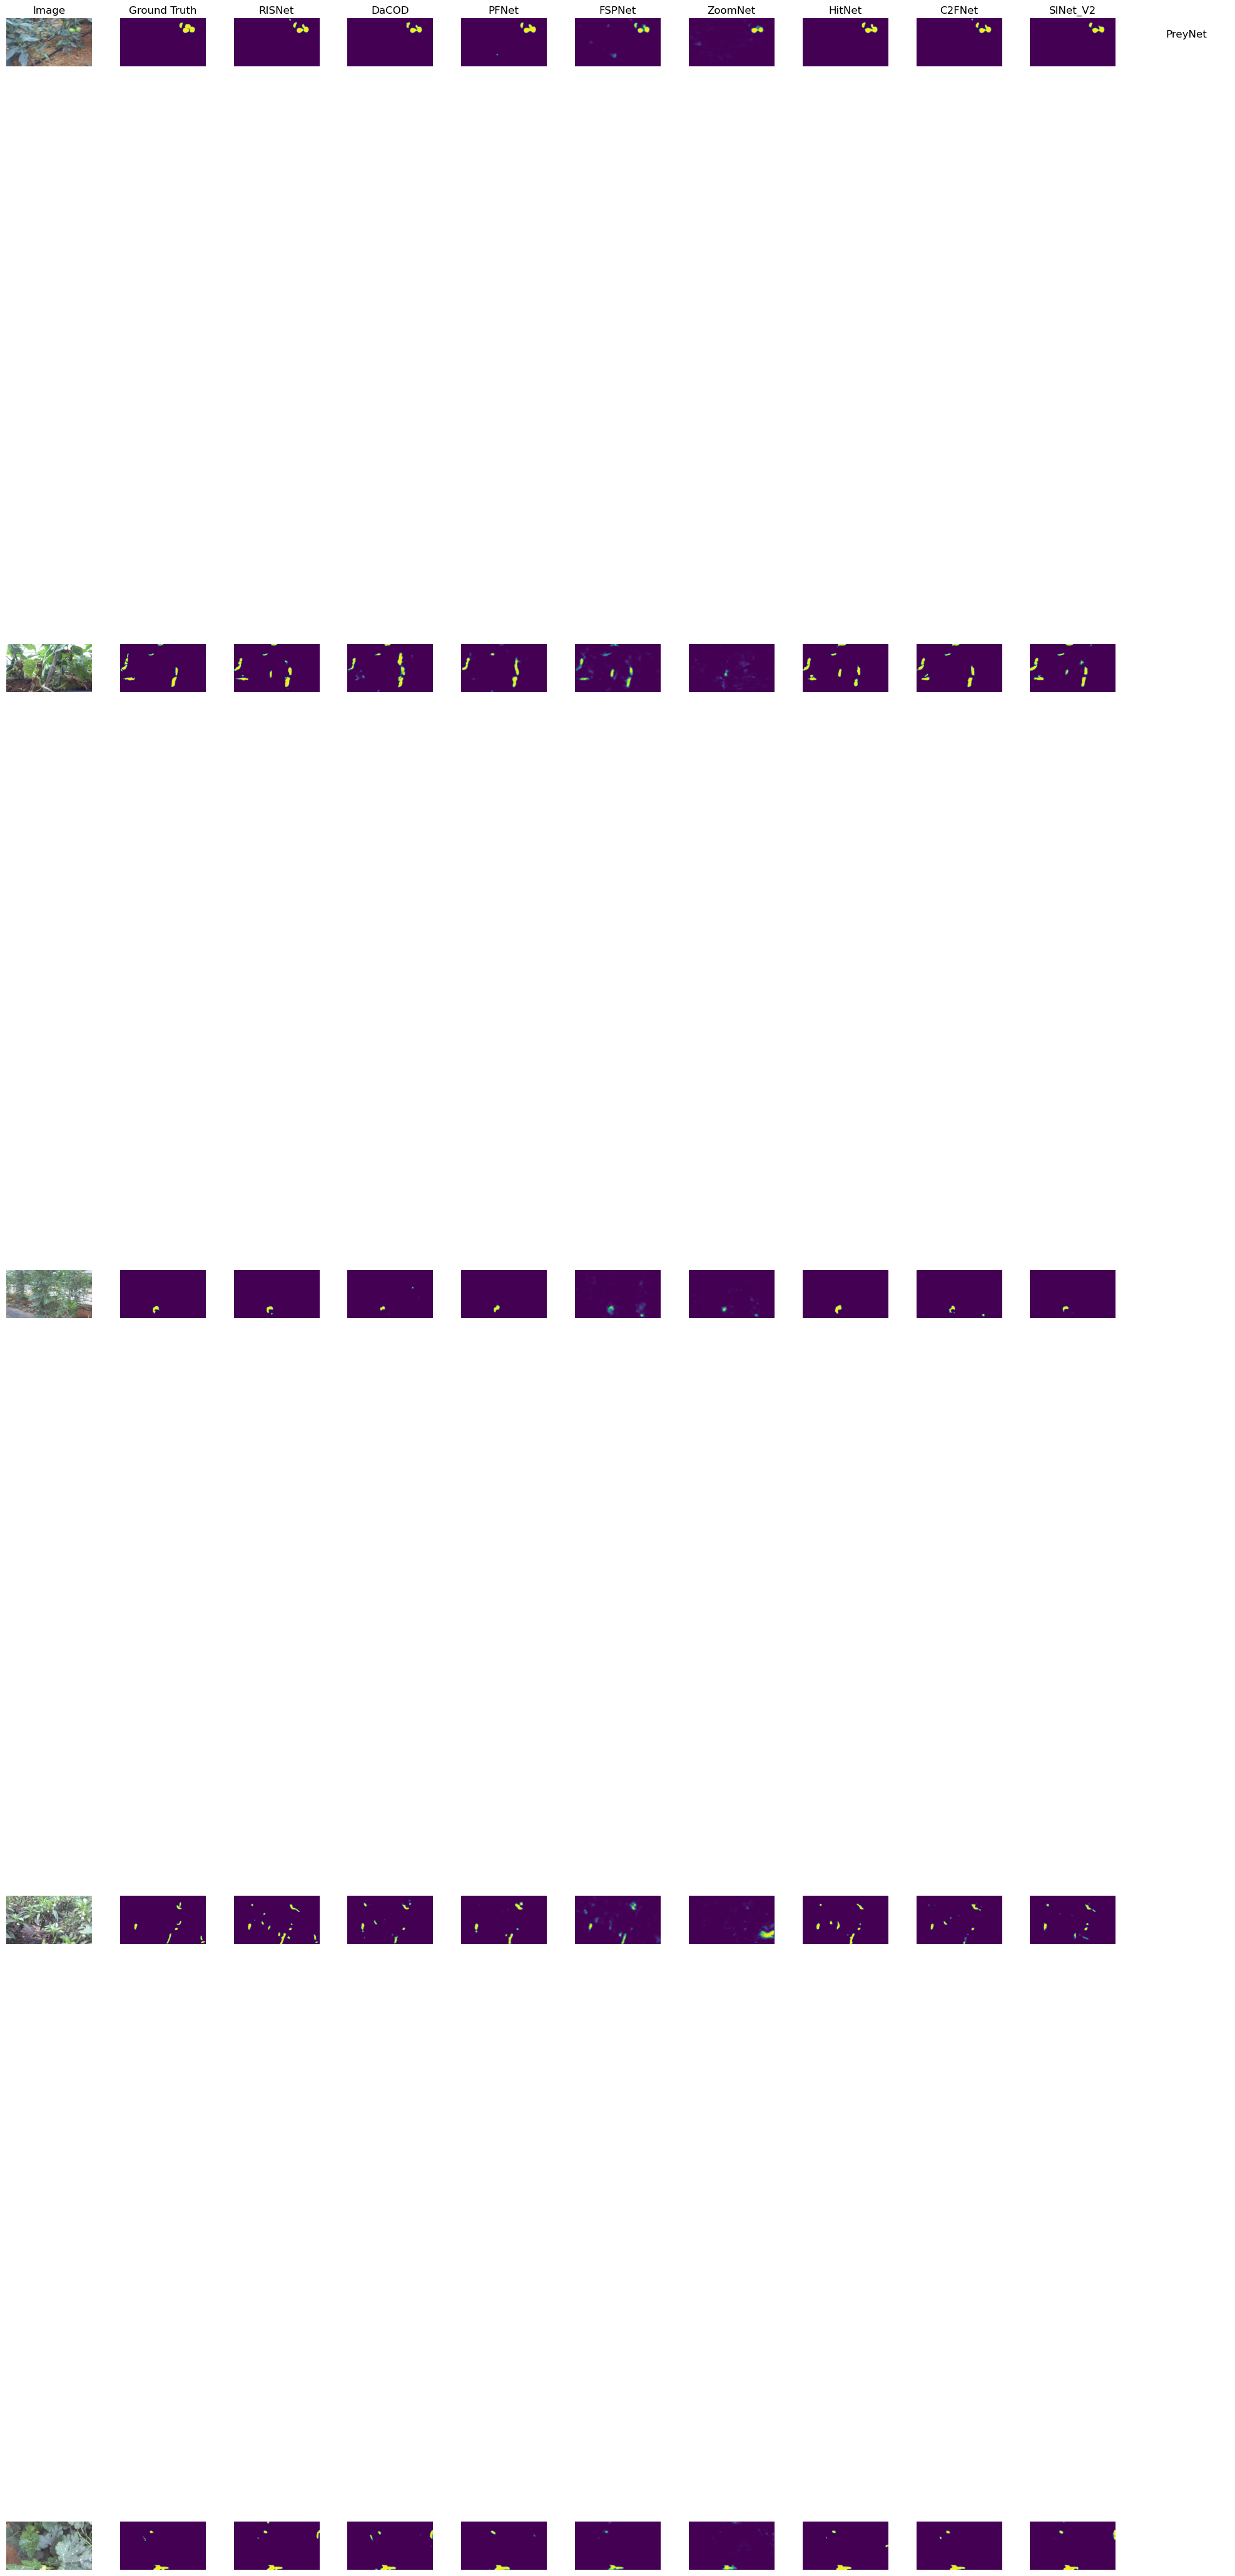

In [11]:
display_images(images=5)

In [6]:
from py_sod_metrics import sod_metrics
from PIL import Image

def get_metrics(gts, preds):
    EMeasure = sod_metrics.Emeasure()
    MAEMeasure = sod_metrics.MAE()
    SMeasure = sod_metrics.Smeasure()
    FWBMeasure = sod_metrics.WeightedFmeasure()

    #Go through each image
    for i in range(len(gts)):
        # 1. Open the image
        gt_image = Image.open(gts[i])
        pred_image = Image.open(preds[i])

        # 2. Convert to Numpy
        np_gt = np.array(gt_image)
        np_pred = np.array(pred_image)

        # 3. Compute for metrics
        EMeasure.step(np_gt, np_pred)
        MAEMeasure.step(np_gt, np_pred)
        SMeasure.step(np_gt, np_pred)
        FWBMeasure.step(np_gt, np_pred)
    
    print(" S | FWB | E | MAE")
    S = round(SMeasure.get_results()["sm"], 3)
    FWB = round(FWBMeasure.get_results()["wfm"], 3)
    E = round(EMeasure.get_results()["em"]["adp"], 3)
    MAE = round(MAEMeasure.get_results()["mae"], 3)
    print(S, "|", FWB, '|', E, "|", MAE)



In [10]:
networks_to_eval = ['ZoomNet', 'C2FNet', "SINet_V2"]
pred_roots_to_eval = ["Results/" + network + "/ACOD-12K/" for network in networks]
preds_networks_to_eval = [[pred_root_to_eval + f for f in os.listdir(pred_root_to_eval) if f.endswith('.tif') or f.endswith('.png')] for pred_root_to_eval in pred_roots_to_eval]
for i in range(len(networks_to_eval)):
    print("=====", networks_to_eval[i], "=====")
    get_metrics(gts, preds_networks_to_eval[i])

===== ZoomNet =====
 S | FWB | E | MAE
0.844 | 0.762 | 0.971 | 0.009
===== C2FNet =====
 S | FWB | E | MAE
0.787 | 0.66 | 0.956 | 0.013
===== SINet_V2 =====
 S | FWB | E | MAE
0.776 | 0.636 | 0.948 | 0.014
